In [34]:
import pandas as pd
import pylab as pl
from random import choices

pl.style.use('bmh')

pd.options.mode.chained_assignment = None

T=pd.read_csv(r'C:\Users\julia\Documents\python36\datasource\data\benford_usa.csv', sep=';')
T.head()

,State,ST,Fips,County,Trump,Clinton,Stein
0,Georgia,GA,13089,"DeKalb County, Georgia",47531,239131,0
1,Texas,TX,48487,"Wilbarger County, Texas",3166,807,13
2,Virginia,VA,51111,"Lunenburg County, Virginia",3206,2226,25
3,Georgia,GA,13297,"Walton County, Georgia",31093,8279,0
4,North Carolina,NC,37011,"Avery County, North Carolina",6226,1670,0


In [16]:
S=T.query('State in ["Wisconsin", "Michigan", "Pennsylvania"]')
S.head()


,State,ST,Fips,County,Trump,Clinton,Stein
6,Michigan,MI,26037,"Clinton County, Michigan",21635,16490,379
12,Michigan,MI,26013,"Baraga County, Michigan",2158,1156,49
20,Pennsylvania,PA,42005,"Armstrong County, Pennsylvania",22676,6849,136
26,Wisconsin,WI,55097,"Portage County, Wisconsin",17310,18524,583
33,Wisconsin,WI,55039,"Fond du Lac County, Wisconsin",31044,17391,449


In [17]:
S=S.query('Trump>=10 and Clinton>=10 and Stein>=10')


In [18]:
len(S)

220

In [19]:
def second_chiffre(n):
    s=str(n)
    return int(s[1])

In [20]:
S['T_2']=S['Trump'].apply(second_chiffre)
S['C_2']=S['Clinton'].apply(second_chiffre)
S['S_2']=S['Stein'].apply(second_chiffre)
S.head()

,State,ST,Fips,County,Trump,Clinton,Stein,T_2,C_2,S_2
6,Michigan,MI,26037,"Clinton County, Michigan",21635,16490,379,1,6,7
12,Michigan,MI,26013,"Baraga County, Michigan",2158,1156,49,1,1,9
20,Pennsylvania,PA,42005,"Armstrong County, Pennsylvania",22676,6849,136,2,8,3
26,Wisconsin,WI,55097,"Portage County, Wisconsin",17310,18524,583,7,8,8
33,Wisconsin,WI,55039,"Fond du Lac County, Wisconsin",31044,17391,449,1,7,4


In [21]:
def effectifs(L):
    return [L.count(k) for k in range(10)]

In [22]:
effectifs(list(S['T_2']))

[22, 31, 23, 24, 25, 23, 24, 21, 14, 13]

In [23]:
E=pd.DataFrame()
E['Trump']=effectifs(list(S['T_2']))
E['Clinton']=effectifs(list(S['C_2']))
E['Stein']=effectifs(list(S['S_2']))
E

,Trump,Clinton,Stein
0,22,19,24
1,31,25,30
2,23,27,14
3,24,20,21
4,25,23,36
5,23,20,6
6,24,27,24
7,21,24,14
8,14,21,23
9,13,14,28


# Benford

In [24]:
F=[0.1197,
0.1139, 0.1088,
0.0967,
0.0934,
0.0904,
0.1043,
0.10030,
0.0876,
0.08491]

In [25]:
E['Benford'] = [220 * p for p in F]
E

,Trump,Clinton,Stein,Benford
0,22,19,24,26.3340
1,31,25,30,25.0580
2,23,27,14,23.9360
3,24,20,21,21.2740
4,25,23,36,20.5480
5,23,20,6,19.8880
6,24,27,24,22.9460
7,21,24,14,22.0660
8,14,21,23,19.2720
9,13,14,28,18.6802


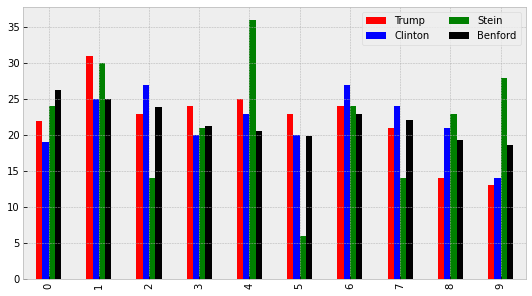

In [28]:
E.plot.bar(figsize=(9, 5),
           color=['red','blue', 'green','black'])
pl.legend(bbox_to_anchor = (1,1), ncol=2)

# Distance

In [29]:
def distance(L1, L2):
    D = 0
    for k in range(10):
        D = D + (L1[k] - L2[k]) ** 2
    return D

In [32]:
distance(E['Trump'], E['Benford'])

154.20886804

In [35]:
L = choices(range(10), F, k = 220)
print(L)

[0, 3, 3, 2, 7, 8, 9, 1, 5, 8, 7, 3, 6, 0, 1, 1, 5, 1, 1, 5, 1, 9, 9, 3, 9, 5, 7, 1, 3, 6, 3, 0, 0, 7, 4, 7, 3, 0, 5, 3, 3, 7, 9, 6, 6, 9, 9, 0, 5, 2, 6, 4, 0, 0, 9, 7, 6, 4, 6, 4, 4, 5, 3, 7, 5, 2, 1, 1, 7, 4, 7, 3, 4, 9, 5, 3, 2, 0, 4, 6, 4, 3, 0, 5, 6, 4, 4, 7, 2, 1, 0, 7, 4, 7, 4, 1, 1, 5, 0, 1, 6, 3, 4, 2, 2, 7, 9, 7, 7, 8, 9, 7, 4, 6, 6, 7, 9, 2, 7, 8, 1, 0, 3, 0, 5, 1, 8, 5, 9, 9, 1, 1, 2, 6, 2, 0, 6, 1, 2, 1, 3, 2, 5, 4, 4, 0, 8, 0, 6, 4, 1, 5, 9, 8, 3, 2, 8, 0, 1, 0, 7, 9, 2, 8, 3, 7, 1, 0, 2, 0, 5, 1, 7, 0, 0, 7, 2, 7, 0, 7, 5, 8, 4, 0, 0, 6, 2, 5, 1, 0, 5, 2, 3, 4, 1, 5, 6, 8, 6, 9, 6, 9, 0, 6, 9, 2, 7, 8, 5, 2, 7, 7, 6, 3, 6, 6, 3, 5, 5, 0]


In [36]:
def vraisemblance(candidat):
    n = 0
    TB = E['Benford']
    TO = E[candidat]
    DO = distance(TO.tolist(), TB.tolist())
    for k in range(10000):
        L = choices(range(10), k=220)
        TS = effectifs(L)
        DS = distance(TS, TB.tolist())
        if DS >= DO:
            n = n + 1
    return n / 10000

In [37]:
distance(effectifs(L), E['Benford'])

120.86246804

In [38]:
for nom in ['Trump', 'Clinton', 'Stein']:
    print(nom, vraisemblance(nom))

Trump 0.8039
Clinton 0.9114
Stein 0.002
